В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



In [57]:
import pandas as pd
from scripts.process_bank_churn import *
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import roc_auc_score, roc_curve, auc
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
df = pd.read_csv('data/bank-customer-churn-prediction-dlu/train.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0


In [55]:
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15000,15594796.0,Chu,0.365155,Germany,Male,0.214286,2.0,0.696265,1.0,1.0,1.0,0.789477,0.0,1.0,0.0,0.0,1.0
1,15001,15642821.0,Mazzi,0.286396,France,Male,0.375000,5.0,0.000000,2.0,1.0,1.0,0.337131,1.0,0.0,0.0,0.0,1.0
2,15002,15716284.0,Onyekachi,0.656325,France,Male,0.446429,8.0,0.000000,2.0,1.0,0.0,0.783859,1.0,0.0,0.0,0.0,1.0
3,15003,15785078.0,Martin,0.682578,Spain,Male,0.482143,3.0,0.000000,1.0,1.0,1.0,0.834571,0.0,0.0,1.0,0.0,1.0
4,15004,15662955.0,Kenechukwu,0.384248,Spain,Male,0.446429,8.0,0.000000,2.0,1.0,1.0,0.718421,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,15642997.0,Chukwumaobim,0.496420,Spain,Male,0.357143,10.0,0.000000,2.0,1.0,1.0,0.248154,0.0,0.0,1.0,0.0,1.0
9996,24996,15739271.0,Clements,0.589499,Spain,Male,0.375000,9.0,0.000000,2.0,1.0,1.0,0.712578,0.0,0.0,1.0,0.0,1.0
9997,24997,15756743.0,Chidiebere,0.818616,France,Male,0.214286,9.0,0.000000,2.0,1.0,0.0,0.024253,1.0,0.0,0.0,0.0,1.0
9998,24998,15680167.0,Yermakova,0.391408,France,Male,0.357143,6.0,0.690650,1.0,1.0,0.0,0.632348,1.0,0.0,0.0,0.0,1.0


In [59]:
data_dict = preprocess_data(df)

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [5]:
def trainModel(data_dict: dict, max_leaf_nodes = None, max_depth = None):
    model = DecisionTreeClassifier(random_state = 42, max_depth = max_depth, max_leaf_nodes = max_leaf_nodes)
    inputs_train = data_dict['inputs_train']
    inputs_val = data_dict['inputs_val']
    targets_train = data_dict['targets_train']
    targets_val = data_dict['targets_val']

    model.fit(inputs_train, targets_train)
    train_pred = model.predict(inputs_train)
    train_score = roc_auc_score(targets_train['Exited'], train_pred)

    val_pred = model.predict(inputs_val)
    val_score = roc_auc_score(targets_val['Exited'], val_pred)

    #print("Max Depth {} Max Leaf nodes {} Train score id {} and validation score is {}".format(max_depth, max_leaf_nodes, train_score, val_score))
    return model, train_score, val_score

In [60]:
modelData = trainModel(data_dict)
model = modelData[0]
print("Глибина дерева {}".format(model.tree_.max_depth))

Глибина дерева 24


З параметрами по замовчуванню бачимо перенавчання

[Text(0.5, 0.8333333333333334, 'x[3] <= 0.455\ngini = 0.324\nsamples = 13500\nvalue = [10753, 2747]'),
 Text(0.25, 0.5, 'x[6] <= 1.5\ngini = 0.187\nsamples = 10834\nvalue = [9702, 1132]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.342\nsamples = 4108\nvalue = [3209, 899]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.067\nsamples = 6726\nvalue = [6493, 233]'),
 Text(0.75, 0.5, 'x[6] <= 1.5\ngini = 0.478\nsamples = 2666\nvalue = [1051, 1615]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.343\nsamples = 1665\nvalue = [366, 1299]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.432\nsamples = 1001\nvalue = [685, 316]')]

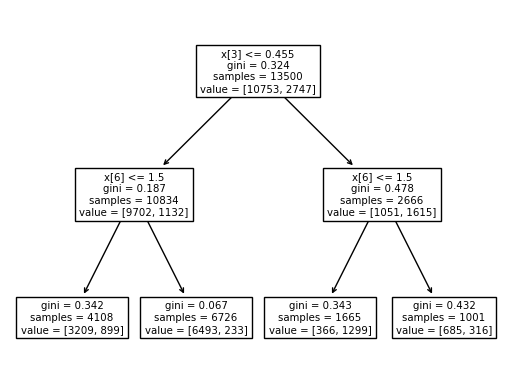

In [33]:
model_2_depth_data = trainModel(data_dict, None, 2)
model_2_depth = model_2_depth_data[0]
plot_tree(model_2_depth)

In [34]:
importance_df = pd.DataFrame({
    'feature': data_dict['inputs_train'].columns,
    'importance': model_2_depth.feature_importances_
}).sort_values('importance', ascending=False)

In [36]:
importance_df.head(10)

,feature,importance
3,Age,0.708305
6,NumOfProducts,0.291695
0,id,0.000000
1,CustomerId,0.000000
2,CreditScore,0.000000
4,Tenure,0.000000
5,Balance,0.000000
7,HasCrCard,0.000000
8,IsActiveMember,0.000000
9,EstimatedSalary,0.000000


Бачимо, що найвпливовішими ознаками є вік та кількість продуктів в користуванні

**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

Я одразу тут почала писати цикл, випадково перейшовши до наступного пункту))

**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [8]:
max_val_score = 0;
max_val_level_leafs = 0;
max_val_level_depth = 0;
train_score_for_val = 0;
for l in range(2, 20):
    for lc in range(2, 20):
        result = trainModel(data_dict, l, lc)
        train_score = round(result[1], 10)
        val_score = round(result[2], 10)
        if val_score > max_val_score:
            max_val_score = val_score
            max_val_level_leafs = l;
            max_val_level_depth = lc;
            train_score_for_val = train_score
print(max_val_score,max_val_level_leafs, max_val_level_depth, train_score_for_val)


0.7998010838 16 6 0.8145924076


Найкращі результати при максимальній глибині 6 і макс кількості листків 16

Text(0, 0.5, 'Score')

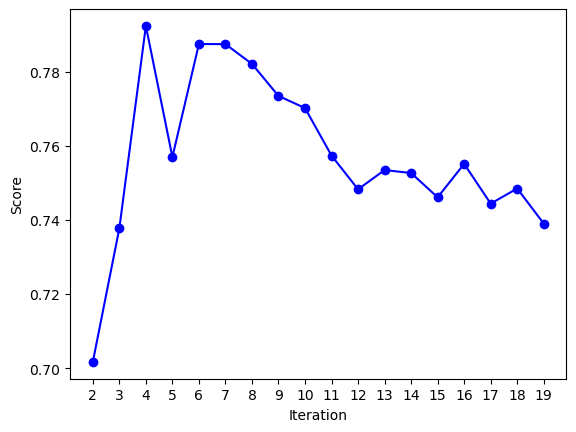

In [9]:
iterations = list(range(2, 20))
scores = []
for i in iterations:
    result = trainModel(data_dict, None, i)
    scores.append(round(result[2], 10))
plt.plot(iterations, scores, marker = 'o', linestyle='-', color = 'b')
plt.xlabel('Iteration')
plt.xticks(iterations)
plt.ylabel('Score')

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [61]:
modelData = trainModel(data_dict, 16, 6)
model = modelData[0]

In [68]:
df = pd.read_csv('data/bank-customer-churn-prediction-dlu/test.csv')

In [48]:
number_cols = data_dict['number_cols']
number_cols_to_scale = data_dict['number_cols_to_scale']
categorical_cols = data_dict['categorical_cols']
scalerObj = data_dict['scalerObj']
encoderObj = data_dict['encoderObj']

In [63]:
test_df = preprocess_new_data(df, scalerObj, encoderObj, number_cols, number_cols_to_scale, categorical_cols)

In [50]:
result = model.predict_proba(test_df)
predicted = result[:,1].round(2)

In [51]:
submission = pd.DataFrame({
    'id':df['id'],
    'Exited':predicted
})
submission.to_csv("data/bank-customer-churn-prediction-dlu/submission_tree.csv",index=False)

![alt text](image.png)

Проте це результат логістичної регресії, в деревах в мене результат 
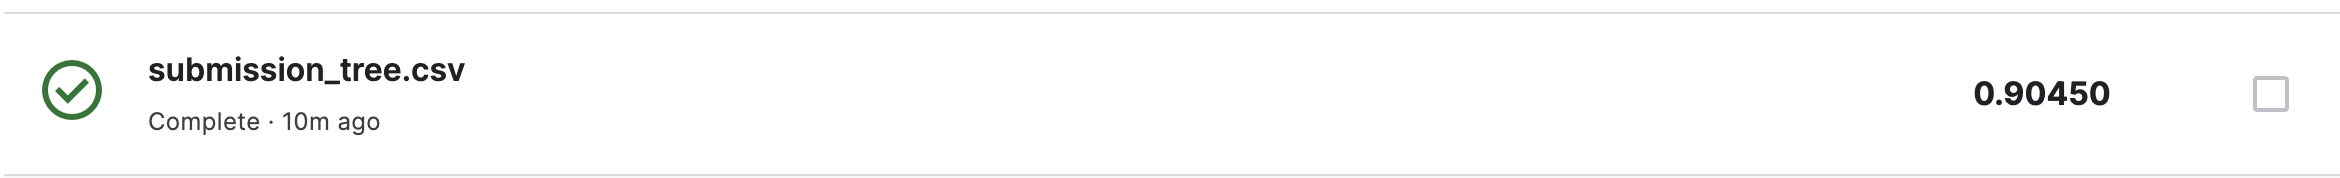